In [ ]:
import os
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

def pandas_df(path: str, file_name: str) -> pd.DataFrame:
    """The func accepts a path and file name from kaggle website.
    params: file_name (str)
    returns: pandas dataframe
    """


    files = os.listdir(path)
    print(f"Files in the dataset directory: {files}")


    csv_files = [f for f in files if f.endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError("No CSV files found in the dataset directory. Check the dataset content.")


    file_name = csv_files[0] if f"{file_name}.csv" not in csv_files else f"{file_name}.csv"


    path = os.path.join(path, file_name)
    return pd.read_csv(path)



elec_path = kagglehub.dataset_download("rajkumarpandey02/electric-vehicle-population-data")
# https://www.kaggle.com/datasets/ironwolf404/electric-vehicle-population-in-usa

elec_ds = pandas_df(elec_path, 'Electric_Vehicle_Population_Data')


Files in the dataset directory: ['Electric_Vehicle_Population_Data.csv']


In [ ]:
print(elec_ds.head())

   VIN (1-10)     County       City State  Postal Code  Model Year    Make  \
0  5YJ3E1EA0K   Thurston   Tumwater    WA      98512.0        2019   TESLA   
1  1N4BZ1DV4N     Island    Clinton    WA      98236.0        2022  NISSAN   
2  5YJ3E1EA0L  Snohomish  Snohomish    WA      98290.0        2020   TESLA   
3  5YJ3E1EBXL       King    Seattle    WA      98134.0        2020   TESLA   
4  5YJSA1CP0D  Snohomish    Edmonds    WA      98020.0        2013   TESLA   

     Model           Electric Vehicle Type  \
0  MODEL 3  Battery Electric Vehicle (BEV)   
1     LEAF  Battery Electric Vehicle (BEV)   
2  MODEL 3  Battery Electric Vehicle (BEV)   
3  MODEL 3  Battery Electric Vehicle (BEV)   
4  MODEL S  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1  Eligibility unknown as battery range has not b...             0.0   
2            Clean Alternative Fuel Ve

In [ ]:
print(elec_ds.shape)

(135038, 17)


In [ ]:
elec_ds.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
elec_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135030 non-null  object 
 2   City                                               135030 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135030 non-null  float64
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

In [ ]:
elec_ds.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,135030.000000,135038.000000,135037.000000,135037.000000,134726.000000,1.350380e+05,1.350300e+05
mean,98171.001577,2019.662880,74.591964,1448.407325,29.504379,2.063432e+08,5.297233e+10
std,2450.367211,3.001676,98.744120,9683.658138,14.783780,8.582417e+07,1.635783e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.606305e+08,5.303301e+10
50%,98121.000000,2021.000000,21.000000,0.000000,34.000000,2.059563e+08,5.303303e+10
75%,98370.000000,2022.000000,150.000000,0.000000,43.000000,2.308888e+08,5.305307e+10
max,99701.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [ ]:
elec_ds['Base MSRP'].sample(10)

,Base MSRP
64042,0.0
28717,0.0
3843,32250.0
30705,0.0
134337,0.0
118618,0.0
20339,0.0
109742,0.0
120760,0.0
113067,0.0


In [ ]:
elec_ds.isna().sum()

,0
VIN (1-10),0
County,8
City,8
State,0
Postal Code,8
Model Year,0
Make,0
Model,249
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
for feature in elec_ds.columns:
  num_missing = elec_ds[feature].isna().sum()
  total_rows = len(elec_ds)
  percentage_missing = (num_missing / total_rows) * 100
  print(f"Column '{feature}': {percentage_missing:.2f}% missing")

Column 'VIN (1-10)': 0.00% missing
Column 'County': 0.01% missing
Column 'City': 0.01% missing
Column 'State': 0.00% missing
Column 'Postal Code': 0.01% missing
Column 'Model Year': 0.00% missing
Column 'Make': 0.00% missing
Column 'Model': 0.18% missing
Column 'Electric Vehicle Type': 0.00% missing
Column 'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 0.00% missing
Column 'Electric Range': 0.00% missing
Column 'Base MSRP': 0.00% missing
Column 'Legislative District': 0.23% missing
Column 'DOL Vehicle ID': 0.00% missing
Column 'Vehicle Location': 0.01% missing
Column 'Electric Utility': 0.01% missing
Column '2020 Census Tract': 0.01% missing


In [ ]:
elec_ds.drop('Base MSRP',axis=1,inplace=True)

In [ ]:
elec_ds['Model Year'] = pd.to_datetime(elec_ds['Model Year'], format='%Y', errors='coerce')

elec_ds['Postal Code'] = elec_ds['Postal Code'].astype(str)



In [ ]:
print(len(elec_ds['Model'].unique()))
print(elec_ds['Model'].value_counts())

126
Model
MODEL 3        25837
MODEL Y        23577
LEAF           13020
MODEL S         7473
BOLT EV         5419
               ...  
GV70               2
FLYING SPUR        1
918                1
Q8                 1
S-10 PICKUP        1
Name: count, Length: 125, dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer


numerical_cols = elec_ds.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols[numerical_cols != 'Model Year']


imputer = SimpleImputer(strategy='mean')


elec_ds[numerical_cols] = imputer.fit_transform(elec_ds[numerical_cols])


categorical_cols = elec_ds.select_dtypes(include=['object']).columns


for col in categorical_cols:
    mode_value = elec_ds[col].mode()[0]
    elec_ds[col] = elec_ds[col].fillna(mode_value)

In [ ]:
elec_ds.isna().sum()


,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
num_duplicates = elec_ds.duplicated().sum()
print(f"Number of duplicate records: {num_duplicates}")


Number of duplicate records: 0


In [ ]:
import numpy as np

def solve_outliers_iqr(df, column_name):

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column_name] = np.where(df[column_name] < lower_bound, lower_bound, df[column_name])
    df[column_name] = np.where(df[column_name] > upper_bound, upper_bound, df[column_name])

    return df


for col in numerical_cols:
    elec_ds = solve_outliers_iqr(elec_ds, col)

In [ ]:
elec_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype         
---  ------                                             --------------   -----         
 0   VIN (1-10)                                         135038 non-null  object        
 1   County                                             135038 non-null  object        
 2   City                                               135038 non-null  object        
 3   State                                              135038 non-null  object        
 4   Postal Code                                        135038 non-null  object        
 5   Model Year                                         135038 non-null  datetime64[ns]
 6   Make                                               135038 non-null  object        
 7   Model                                              135038 non-null  object        
 8   Elec

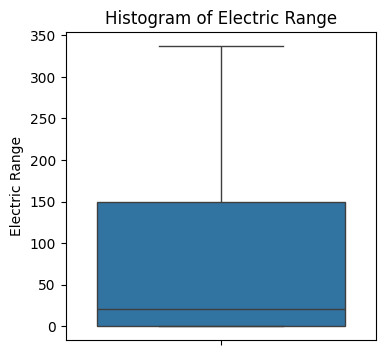

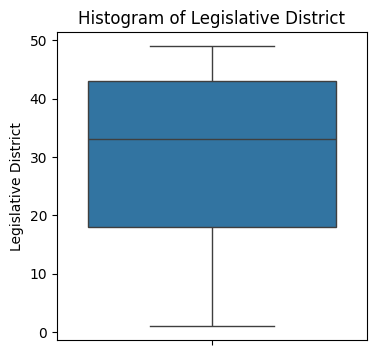

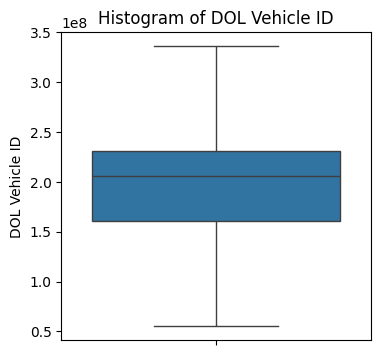

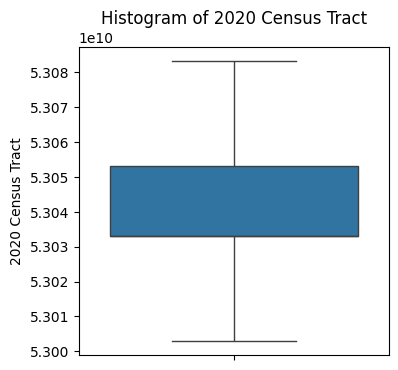

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(elec_ds[col])
    plt.title(f'Histogram of {col}')
    plt.show()

In [ ]:
print(elec_ds['State'].unique())
print(len(elec_ds['State'].unique()))
print(elec_ds['City'].unique())
print(len(elec_ds['City'].unique()))

['WA' 'CA' 'AZ' 'AP' 'IL' 'KS' 'VA' 'NE' 'DC' 'MD' 'TX' 'NV' 'UT' 'GA'
 'NC' 'SC' 'MO' 'CO' 'AR' 'FL' 'NJ' 'ID' 'HI' 'MI' 'DE' 'OR' 'LA' 'OH'
 'NM' 'WY' 'TN' 'OK' 'KY' 'AL' 'MS' 'PA' 'CT' 'IN' 'NY' 'AK' 'MA' 'MT'
 'NH' 'BC' 'RI' 'MN']
46
['Tumwater' 'Clinton' 'Snohomish' 'Seattle' 'Edmonds' 'Manson'
 'Marysville' 'Olympia' 'Lacey' 'Bothell' 'Hansville' 'Woodway' 'Naches'
 'Cashmere' 'Lake Stevens' 'Port Orchard' 'Monroe' 'Bremerton' 'Poulsbo'
 'Kingston' 'Lynnwood' 'San Rafael' 'Pullman' 'Greenbank' 'Coupeville'
 'Yakima' 'Renton' 'Rochester' 'Anacortes' 'Bainbridge Island' 'Redmond'
 'Elk' 'Everett' 'Dupont' 'Seatac' 'Vashon' 'Leavenworth' 'Yelm' 'Selah'
 'Tempe' 'East Wenatchee' 'Kirkland' 'Mount Vernon' 'Moses Lake' 'Kent'
 'Langley' 'Dayton' 'Cowiche' 'Brier' 'Arlington' 'Spokane' 'Shoreline'
 'Bellevue' 'Brush Prairie' 'Issaquah' 'Mukilteo' 'Washougal'
 'Friday Harbor' 'Bellingham' 'Seabeck' 'Federal Way' 'Sammamish'
 'Vancouver' 'Mercer Island' 'Lake Forest Park' 'Tacoma' 'Edgewo

In [ ]:
print(elec_ds['County'].unique())
print(len(elec_ds['County'].unique()))

['Thurston' 'Island' 'Snohomish' 'King' 'Chelan' 'Kitsap' 'Yakima' 'Marin'
 'Whitman' 'Skagit' 'Pend Oreille' 'Pierce' 'Maricopa' 'Douglas' 'Grant'
 'Columbia' 'Spokane' 'Clark' 'San Juan' 'Whatcom' 'Clallam' 'Cowlitz'
 'Lewis' 'Benton' 'Walla Walla' 'Jefferson' 'Kittitas' 'Okanogan' 'Mason'
 'Stevens' 'Garfield' 'Skamania' 'Franklin' 'Grays Harbor' 'Klickitat'
 'Adams' 'Kings' 'Pacific' 'Wahkiakum' 'Ferry' 'Asotin' 'Lake'
 'Leavenworth' 'San Diego' 'Fairfax' 'Stafford' 'Lincoln' 'Loudoun'
 'Sarpy' 'District of Columbia' 'Los Angeles' 'Anne Arundel' 'Galveston'
 'Kern' 'Virginia Beach' 'Contra Costa' 'San Bernardino' 'Salt Lake'
 "St. Mary's" 'Ventura' 'Rockdale' 'Cook' 'Chesapeake' 'Moore' 'St. Clair'
 'Beaufort' 'Portsmouth' 'Riverside' 'Ray' "Prince George's" 'Solano'
 'Monterey' 'El Paso' 'Pulaski' 'Cumberland' 'Hillsborough' 'Richmond'
 'Howard' 'Orange' 'Santa Clara' 'Burlington' 'Kootenai' 'Washington'
 'Honolulu' 'Montgomery' 'Charleston' 'Alameda' 'Emmet' 'Sacramento'
 'Housto

In [ ]:
print(elec_ds['Model Year'].min())
print(elec_ds['Model Year'].max())

1997-01-01 00:00:00
2024-01-01 00:00:00


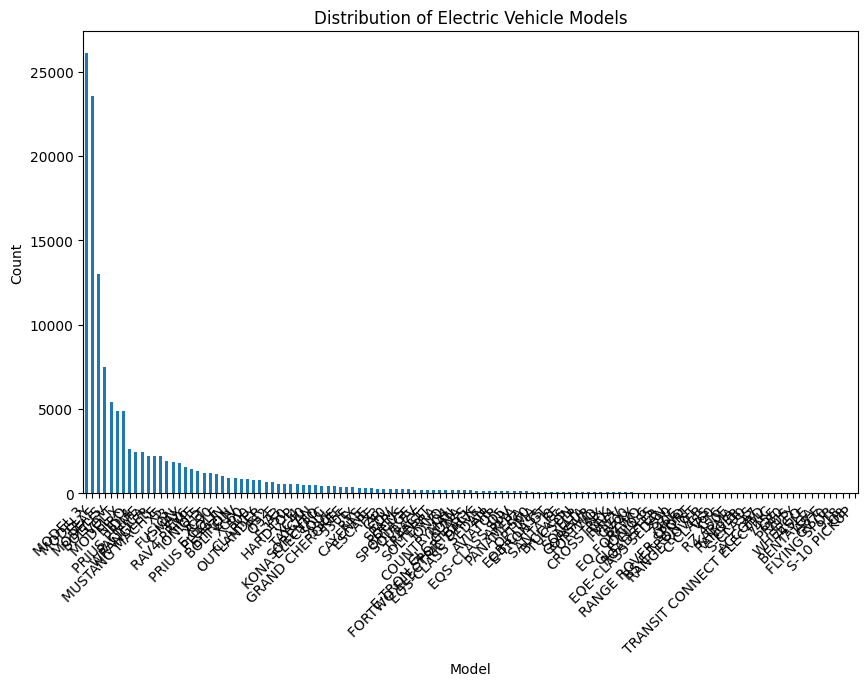

In [ ]:
model_counts = elec_ds['Model'].value_counts()
model_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Electric Vehicle Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

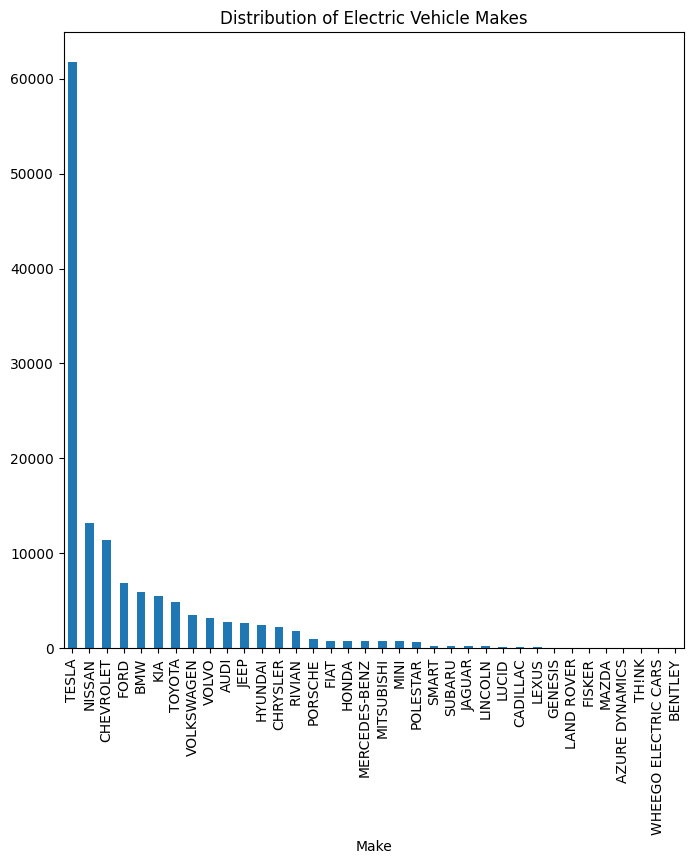

In [ ]:
make_counts = elec_ds['Make'].value_counts()
make_counts.plot(kind='bar', figsize=(8, 8))
plt.title('Distribution of Electric Vehicle Makes')
plt.show()

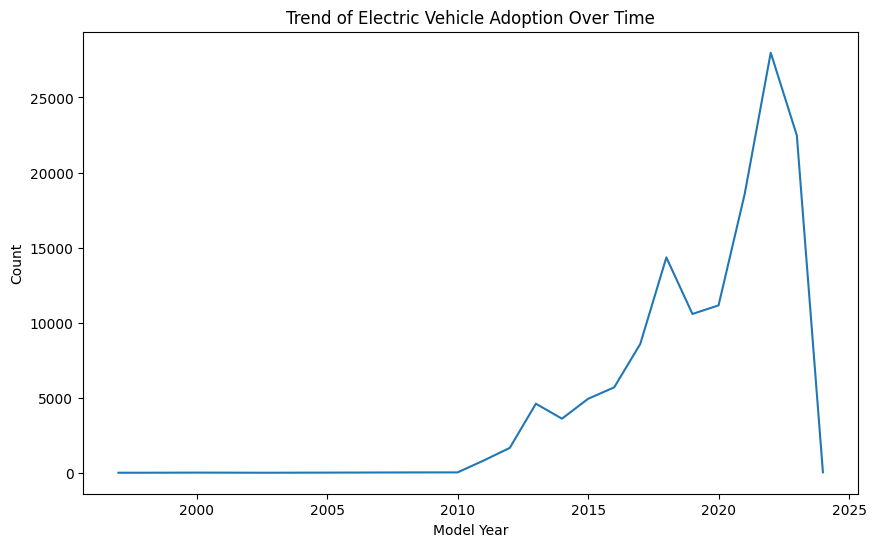

In [ ]:
elec_ds['Model Year'].dt.year.value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Trend of Electric Vehicle Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

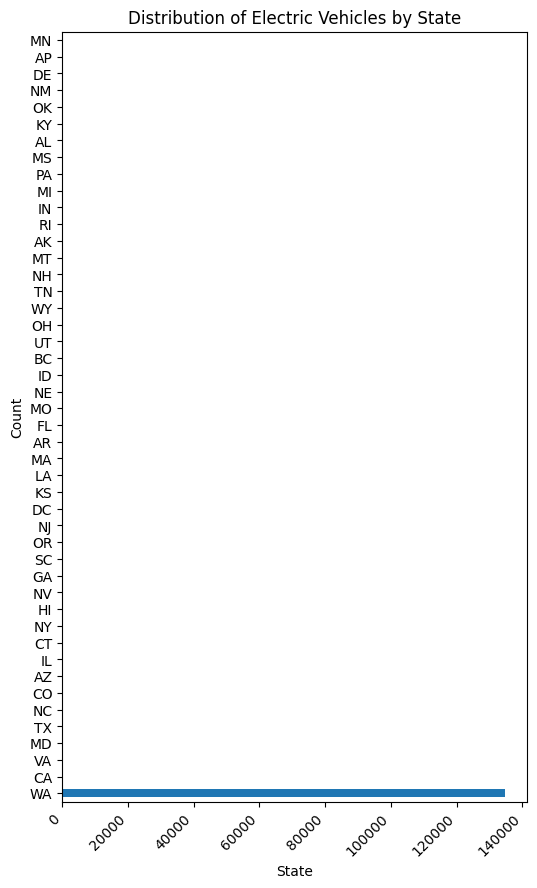

In [ ]:
state_counts = elec_ds['State'].value_counts()
# Create a choropleth map using a library like geopandas or plotly (if available)
# Alternatively, create a bar chart
state_counts.plot(kind='barh', figsize=(6, 10))
plt.title('Distribution of Electric Vehicles by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()